# Huffman Coding

Huffman coding is an algorithm for [lossless data compression](https://en.wikipedia.org/wiki/Lossless_data_compression)

This notebook will implement huffman coding to compress the entire works of [William Shakespeare](https://en.wikipedia.org/wiki/William_Shakespeare).

In [1]:
with open('shakespeare.txt') as file:
    
    text = file.read()
    text = list(filter(lambda x: x not in '\n,[](){}<>,/?|.;-_ 1234567890!@#`$$%^&*":\'' ,text))

print(f"The total works of Shakespeare are {len(text)} characters long.")
print(f"In ASCII, each char is 8 bits, so the current size of the file is {len(text) * 8} bits, or {len(text)} bytes.")

The total works of Shakespeare are 3696354 characters long.
In ASCII, each char is 8 bits, so the current size of the file is 29570832 bits, or 3696354 bytes.


In [2]:
counts = {i : text.count(i) for i in set(text)}
total_letters = sum(counts.values())

We can now use these values to calculate the frequency of these letters in Shakespeare's works.

In [3]:
for i in sorted(counts.keys(), key=lambda x: -counts[x]):
    print(f"The character {i} occurs {counts[i]} times.")

The character e occurs 403878 times.
The character t occurs 289404 times.
The character o occurs 280908 times.
The character a occurs 244270 times.
The character h occurs 218200 times.
The character n occurs 215562 times.
The character s occurs 214680 times.
The character r occurs 208489 times.
The character i occurs 197780 times.
The character l occurs 145919 times.
The character d occurs 133557 times.
The character u occurs 114637 times.
The character m occurs 95432 times.
The character y occurs 85140 times.
The character w occurs 72843 times.
The character f occurs 68671 times.
The character c occurs 66478 times.
The character g occurs 56951 times.
The character I occurs 47303 times.
The character b occurs 46457 times.
The character p occurs 46403 times.
The character A occurs 39767 times.
The character T occurs 34375 times.
The character v occurs 33942 times.
The character E occurs 32070 times.
The character k occurs 29179 times.
The character S occurs 28196 times.
The character O 

In [4]:
total = 0 
perc = []
for i in counts.keys():
    perc.append(counts[i]/sum(counts.values()))
sum(perc)

0.9999999999999996

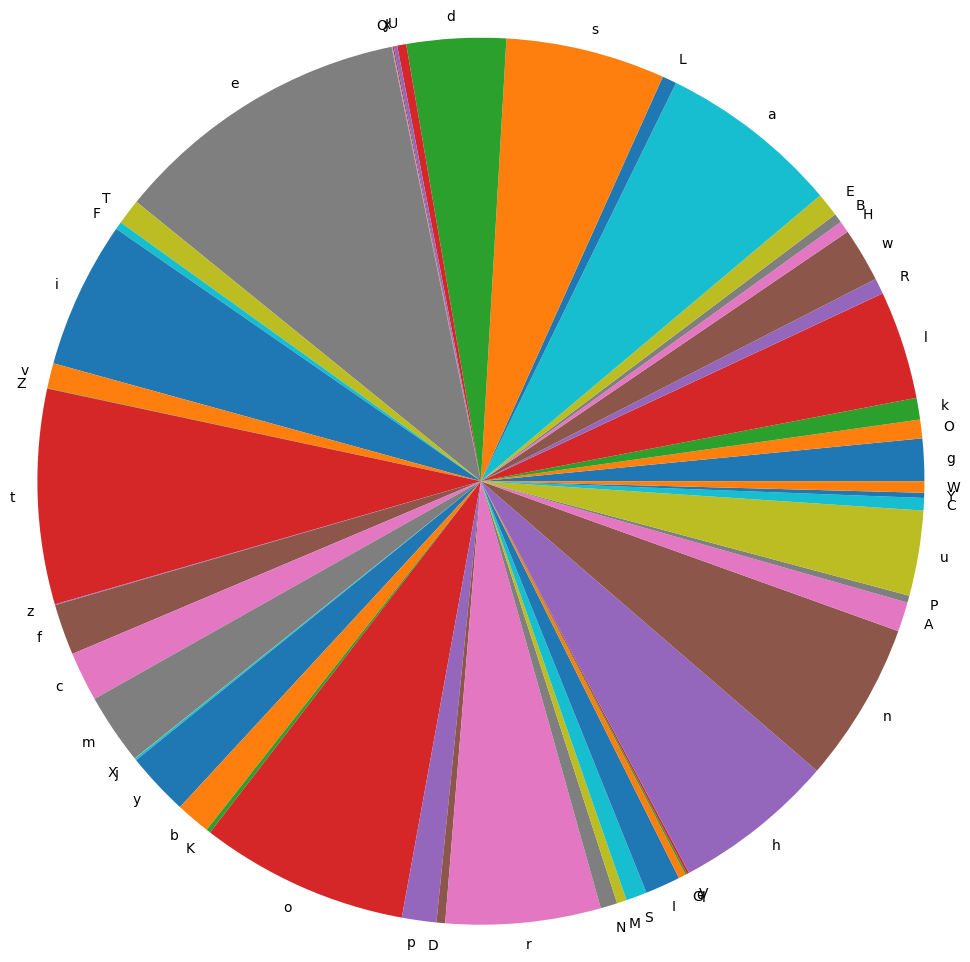

In [5]:
import matplotlib.pyplot as plt

plt.pie(perc, 
        labels=counts.keys(), 
        radius=3, 
        labeldistance=1.05,)
plt.show()

In [9]:
from heapq import *

class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left, self.right = left, right
    def __le__(self, other):
        return self.freq <= other.freq
    def __lt__(self, other):
        return self.freq < other.freq       

nodes = [Node(freq, symbol) for symbol, freq in counts.items()]

def create_tree(text):
    counts = {i : text.count(i) for i in set(text)}
    nodes = [Node(freq, symbol) for symbol, freq in counts.items()]
    heapify(nodes)
    while len(nodes) > 1:
        left, right = heappop(nodes), heappop(nodes)
        heappush(nodes, Node(left.freq+right.freq, None, left, right))
    return nodes[0]

def generate_encoding(tree):
    encoding = {}

    def traverse(tree, c=""):
        #print(tree.symbol, tree.freq, c)
        if tree.symbol:
            encoding[tree.symbol] = c
            return

        c_left = ''.join([c, '0'])
        traverse(tree.left, c_left)

        c_right = ''.join([c, '1'])
        traverse(tree.right, c_right)
        
    traverse(tree)
        
    return encoding

def encode(text, table):
    encoded_text = []
    for i in text:
        encoded_text.append(table[i])
    return ''.join(encoded_text)
        
def single_encode(text):
    encoding = generate_encoding(create_tree(text))
    return encode(text, encoding)

In [10]:
encodedsingle_encode(text))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
encoded_text = encode(text, encoding)

NameError: name 'encoding' is not defined

In [149]:
len(encoded_text) / 42712768

0.5292926461708124

In [187]:
text = "abcdefghijklmnopqrtsuvwxyz"

In [204]:
print(len(''.join(format(ord(x), 'b') for x in text)))

print(len(single_encode(text)))

In [205]:
print(len(''.join(format(ord(x), 'b') for x in text)))